# Introduction to Scikit-learn (sklearn)

This notebook demonstrates some of most useful functions of the beautiful Scikit-Learn library

What we're going to cover

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready

import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [8]:
# Evaluate the model on the training data and test data
clf.score(X_train, y_train)


1.0

In [9]:
clf.score(X_test, y_test)

0.7704918032786885

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[22,  8],
       [ 6, 25]])

In [12]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [13]:
# Improve model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set :  {clf.score(X_test,y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators..
Model accuracy on test set :  77.05%
 
Trying model with 20 estimators..
Model accuracy on test set :  81.97%
 
Trying model with 30 estimators..
Model accuracy on test set :  73.77%
 
Trying model with 40 estimators..
Model accuracy on test set :  78.69%
 
Trying model with 50 estimators..
Model accuracy on test set :  73.77%
 
Trying model with 60 estimators..
Model accuracy on test set :  75.41%
 
Trying model with 70 estimators..
Model accuracy on test set :  80.33%
 
Trying model with 80 estimators..
Model accuracy on test set :  77.05%
 
Trying model with 90 estimators..
Model accuracy on test set :  77.05%
 


In [14]:
# 6. Save model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [15]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test)

0.7704918032786885

In [16]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.7 (default, Sep 16 2021, 13:09:58)  [GCC 7.5.0]
executable: /home/ewins/anaconda3/bin/python
   machine: Linux-5.11.0-49-generic-x86_64-with-glibc2.33

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 0.24.2
        numpy: 1.21.2
        scipy: 1.7.1
       Cython: 0.29.24
       pandas: 1.3.4
   matplotlib: 3.4.3
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


## 1. Getting our data ready to be used with ML

Three main things we have to do:
   1. Split data into features and labels (usually `X` & `y`)
   2. Filling (also calling imputing) or disregarding missing values
   3. Converting non-numerical values to numerical values (also called feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop("target", axis = 1)

In [20]:
y = heart_disease["target"]

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [24]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
len(car_sales)

1000

In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
# Split into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [29]:
# Split into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [30]:
# Build ml model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Toyota'

In [31]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer  = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")
transformer_X = transformer.fit_transform(X)
transformer_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
pd.DataFrame(transformer_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [36]:
# Let's refit our model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformer_X,y, test_size=0.2)

In [37]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
model.score(X_test,y_test)

0.3235867221569877

## 1.2 What if there were missing values

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data together

In [64]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [65]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
# Create X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [69]:
# Let's try to convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformer_x = transformer.fit_transform(X)
transformer_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with pandas

In [70]:
# Fill the "Make" colunm
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" colunm
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

In [71]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [72]:
#Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [73]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [74]:
len(car_sales_missing)

950

In [75]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [76]:
# Let's try to convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformer_x = transformer.fit_transform(car_sales_missing)
transformer_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option2: fill missing values with sklearn


In [77]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [78]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [79]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [80]:
len(car_sales_missing)

950

In [81]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [82]:
# Slip into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [84]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [85]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [86]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [87]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [88]:
# Let's try to convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformer_x = transformer.fit_transform(car_sales_filled)
transformer_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [89]:
# Now we've got our data as numbers and filled(no missing values)
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformer_x,y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for our problems

Scikit Learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

### 2.1 Picking a ML model for a regression problem


In [49]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [50]:
import pandas as pd

In [51]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

In [52]:
boston_df["target"] = pd.Series(boston["target"])

In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
len(boston_df)

506

In [11]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge
rdg =  Ridge()

# Setup random seed
np.random.seed(42)

# Create data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Train model
rdg.fit(X_train,y_train)

# Check the score
rdg.score(X_test,y_test)

0.6662221670168522

How do we improve this score

What if Ridge wasn't working

Let's refer back to the map..... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [14]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8922527442109116

## 2.2 Choosing an estimator for a classification problem

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try LinearSVC

In [19]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

#Evaluation
model.score(X_test, y_test)

/home/ewins/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [18]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [20]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Evaluation
model.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make predictiions

###  3.1 Fitting the model on the data

In [21]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
model = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
model.fit(X_train, y_train)

#Evaluation (use the patterns the model has learned)
model.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [46]:
# Use a trained model to make predictions
model.predict_proba([[21,1,137,200,1,1,147,0,1.7,2,0,1,0]])

array([[0.72, 0.28]])

In [42]:
X_test[:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [25]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [26]:
# Compare predictions to truth labels to evaluate the model

y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with predict_proba()

In [31]:
# predict_proba() returns probabilities of a classification
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [32]:
# Let's prredict() on the same data
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

In [47]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test,y_test)

0.8654448653350507

In [48]:
# Make predictions
y_preds = model.predict(X_test)

In [50]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [51]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [52]:
# COmpare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating ML models

Three ways to evaluate scikit-learn models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [53]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [54]:
#Evaluation with score
model.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression

In [55]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)


RandomForestRegressor()

In [56]:

model.score(X_test,y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter

In [1]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train);


In [7]:
model.score(X_test,y_test)

0.8524590163934426

In [8]:
cross_val_score(model,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [9]:
np.random.seed(42)

# Single training and test split score
clf_single_score = model.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(model,X,y))

#Compare the two
clf_single_score , clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy
# model.score()

In [10]:
# Scoring parameter set to none by default
cross_val_score(model,X,y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classifiction report

In [14]:
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y)

In [15]:
np.mean(cross_val_score)

0.8248087431693989

In [16]:
print(f"Heart Disease Classifier Cross-Valided Accuracy : {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Accuracy : 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positve rate (tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* false positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* false negative = model predicts 0 when truth is 1

In [ ]:
# Create the data
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:5]
# Keep 

array([[0.9 , 0.1 ],
       [0.5 , 0.5 ],
       [0.38, 0.62],
       [0.92, 0.08],
       [0.27, 0.73]])

In [19]:
y_probs_postive = y_probs[:,1]
y_probs_postive[:10]

array([0.1 , 0.5 , 0.62, 0.08, 0.73, 0.88, 0.57, 0.06, 0.03, 0.44])

In [20]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_postive)

In [22]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.24137931,
       0.24137931, 0.27586207, 0.4137931 , 0.44827586, 0.51724138,
       0.55172414, 0.65517241, 0.68965517, 0.72413793, 0.86206897,
       0.89655172, 0.96551724, 1.        ])

In [23]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
%matplotlib inline

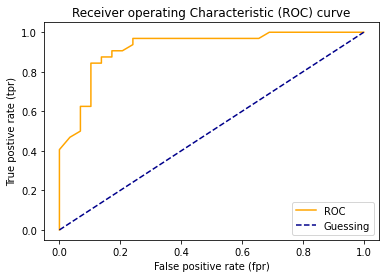

In [26]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label = "ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label = "Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True postive rate (tpr)")
    plt.title("Receiver operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_postive)

0.9207974137931034

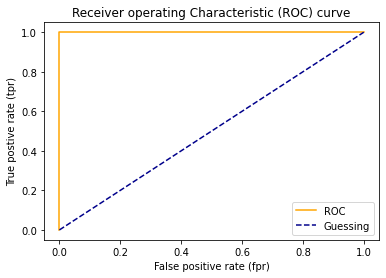

In [28]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [29]:
 roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare labels a model predicts and the actuals labels it was supposed to predict

In essence, giving you an idea of where the model confused

In [30]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 4, 28]])

In [31]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,25,4
1,4,28


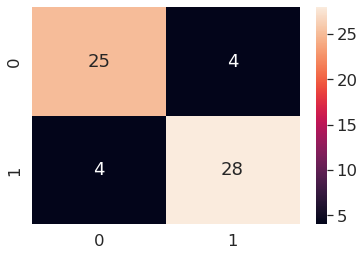

In [36]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat,annot=True);

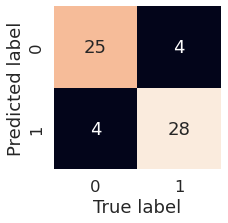

In [38]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info
                    cbar = False) 
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
plot_conf_mat(conf_mat)

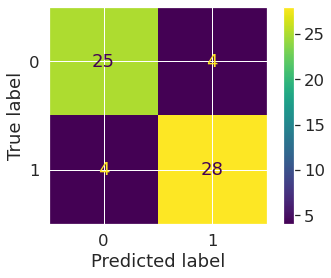

In [42]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test, y_test);

**Classification report**

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## 4.2.2 Regression model evaluation metrics

1. R² (pronounced r-square) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R²**
What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R² value would be 0. And if your model perfectly predicts a range of numbers it's R² value woulb be 1


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train);

In [66]:
model.score(X_test, y_test)

0.8654448653350507

In [72]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [73]:
y_test.mean()

21.488235294117654

In [69]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [74]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [75]:
# Mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [81]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df["differences"] = df["differences"].abs()
df

,actual values,predicted values,differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


In [82]:
df["differences"].sum()/102

2.136382352941176

**Mean squared error**

In [83]:
#Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)

mse

9.867437068627442

In [85]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df["differences"] = df["differences"]**2
df

,actual values,predicted values,differences
173,23.6,23.081,0.269361
274,32.4,30.574,3.334276
491,13.6,16.759,9.979281
72,22.8,23.460,0.435600
452,16.1,16.893,0.628849
...,...,...,...
412,17.9,13.159,22.477081
436,9.6,12.476,8.271376
411,17.2,13.612,12.873744
86,22.5,20.205,5.267025


In [87]:
df["differences"].mean()

9.867437068627439

### 4.2.3 Finally using `scoring` parameter

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [89]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [90]:
# cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [91]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y,scoring="accuracy" )
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [93]:
cv_precision = cross_val_score(clf, X, y,scoring="precision" )
np.mean(cv_precision)

0.8209201193072161

In [94]:
cv_recall = cross_val_score(clf, X, y,scoring="recall" )
np.mean(cv_recall)

0.8484848484848484

In [95]:
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
np.mean(cv_f1)

0.8455032904593217

how about our regression model ?

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [104]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y)
np.mean(cv_r2)

0.6243870737930857

In [103]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [105]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y , scoring="neg_mean_absolute_error")
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [107]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y , scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.261442856882137

### 4.3 Using different evaluation metrics zs Scikit-Learn functions

**classification evaluation functions**

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#MAke some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test,y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test,y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression evaluation functions**

In [110]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)


#MAke some predictions
y_preds = model.predict(X_test)

# Evaluate the classifier
print("Regression metrics on the test set")
print(f"R²: {r2_score(y_test,y_preds)}")
print(f"mean_absolute_error: {mean_absolute_error(y_test,y_preds)}")
print(f"mean_squared_error: {mean_squared_error(y_test,y_preds)}")

Regression metrics on the test set
R²: 0.8654448653350507
mean_absolute_error: 2.136382352941176
mean_squared_error: 9.867437068627442


### Improving a model
First predictions = baseline predictions,
First model = baseline model

From a data perspective:
* Could we collect more data ? (generally, the more data , the better)
* Could we improve our data?

From a model perspective:

* Is there a better moel we could use?
* Could we improve the current model ?
    
Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand 
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [1]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [2]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand
Let's make 3 sets , training, validation and test

We're going to try and adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [20]:
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score

In [25]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision,2),
                  "recall": round(recall,2),
                  "f1": round(f1,2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 score: {f1:.2f}%")
    
    return metric_dict

In [6]:
import pandas as pd
import numpy as np

In [8]:
heart_disease = pd.read_csv("heart-disease.csv")

In [30]:
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 81.48%
Recall: 0.88%
F1 score: 0.85%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [43]:
np.random.seed(42)

clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(X_train, y_train)

# Make baseline predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the classifier on validation set
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Acc: 91.11%
Precision: 92.00%
Recall: 0.92%
F1 score: 0.92%


{'accuracy': 0.91, 'precision': 0.92, 'recall': 0.92, 'f1': 0.92}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

grid = {"n_estimators": [10,100,200,1000,1200],
        "max_depth": [None,5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2)

# Fit the randomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total ti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 1000,
                                                         1200]},
                   verbose=2)

In [34]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

In [35]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 83.61%
Precision: 78.12%
Recall: 0.89%
F1 score: 0.83%


### 5.3 Hyperparameter tuning with GridSearchCV

In [36]:
grid

{'n_estimators': [10, 100, 200, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [38]:
grid_2 = {"n_estimators": [100,500,1200],
        "max_depth": [None,5],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [4],
       "min_samples_leaf": [2, 4]}

In [39]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   8.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   8.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4,

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   2.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   3.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   4.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  10.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   7.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  11.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  12.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   7.2s
[CV] END max_depth=5, max_features=auto, mi

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4], 'min_samples_split': [4],
                         'n_estimators': [100, 500, 1200]},
             verbose=2)

In [40]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [41]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 85.25%
Precision: 78.79%
Recall: 0.93%
F1 score: 0.85%


Let's compare our different models metrics

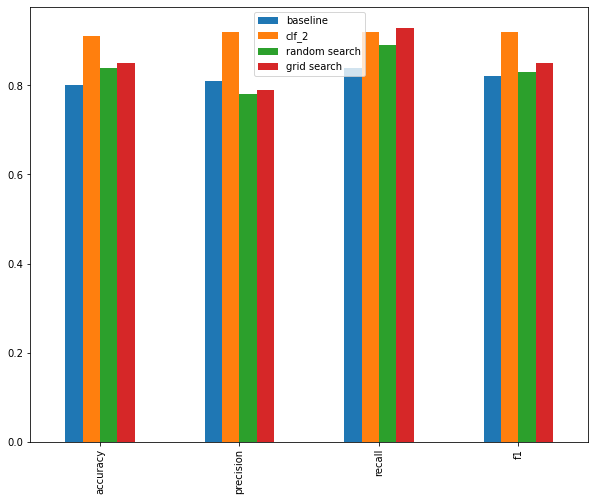

In [44]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2":clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**pickle**

In [1]:
import pickle

.......

## 7. Putting it all together

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [5]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [6]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do (all in one cell)
1. Fill missing data
2. convert data to numbers
3. Build a model on the data

In [7]:
# Getting data ready
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset= ["Price"], inplace = True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant", fill_value="missing")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy="constant", fill_value=4)),
])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy="mean")),
])

# Setup preprocessing steps (fill missing values, then convert o numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_feature)
    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())])

#Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our Pipeline

In [8]:
# Use GridSearchCV with our regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean", "median"],
    "model__n_estimators":[1000],
    "model__max_depth": [None, 5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model, pipe_grid , cv = 5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=  10.7s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=  17.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   8.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=  16.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=  11.8s
[CV] END model__max_depth=None, model__max_features=auto, model__min_s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         